In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from PCA import *

In [5]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
activations = main('EleutherAI/pythia-14m')

  5%|▍         | 6/130 [00:24<08:19,  4.02s/it]


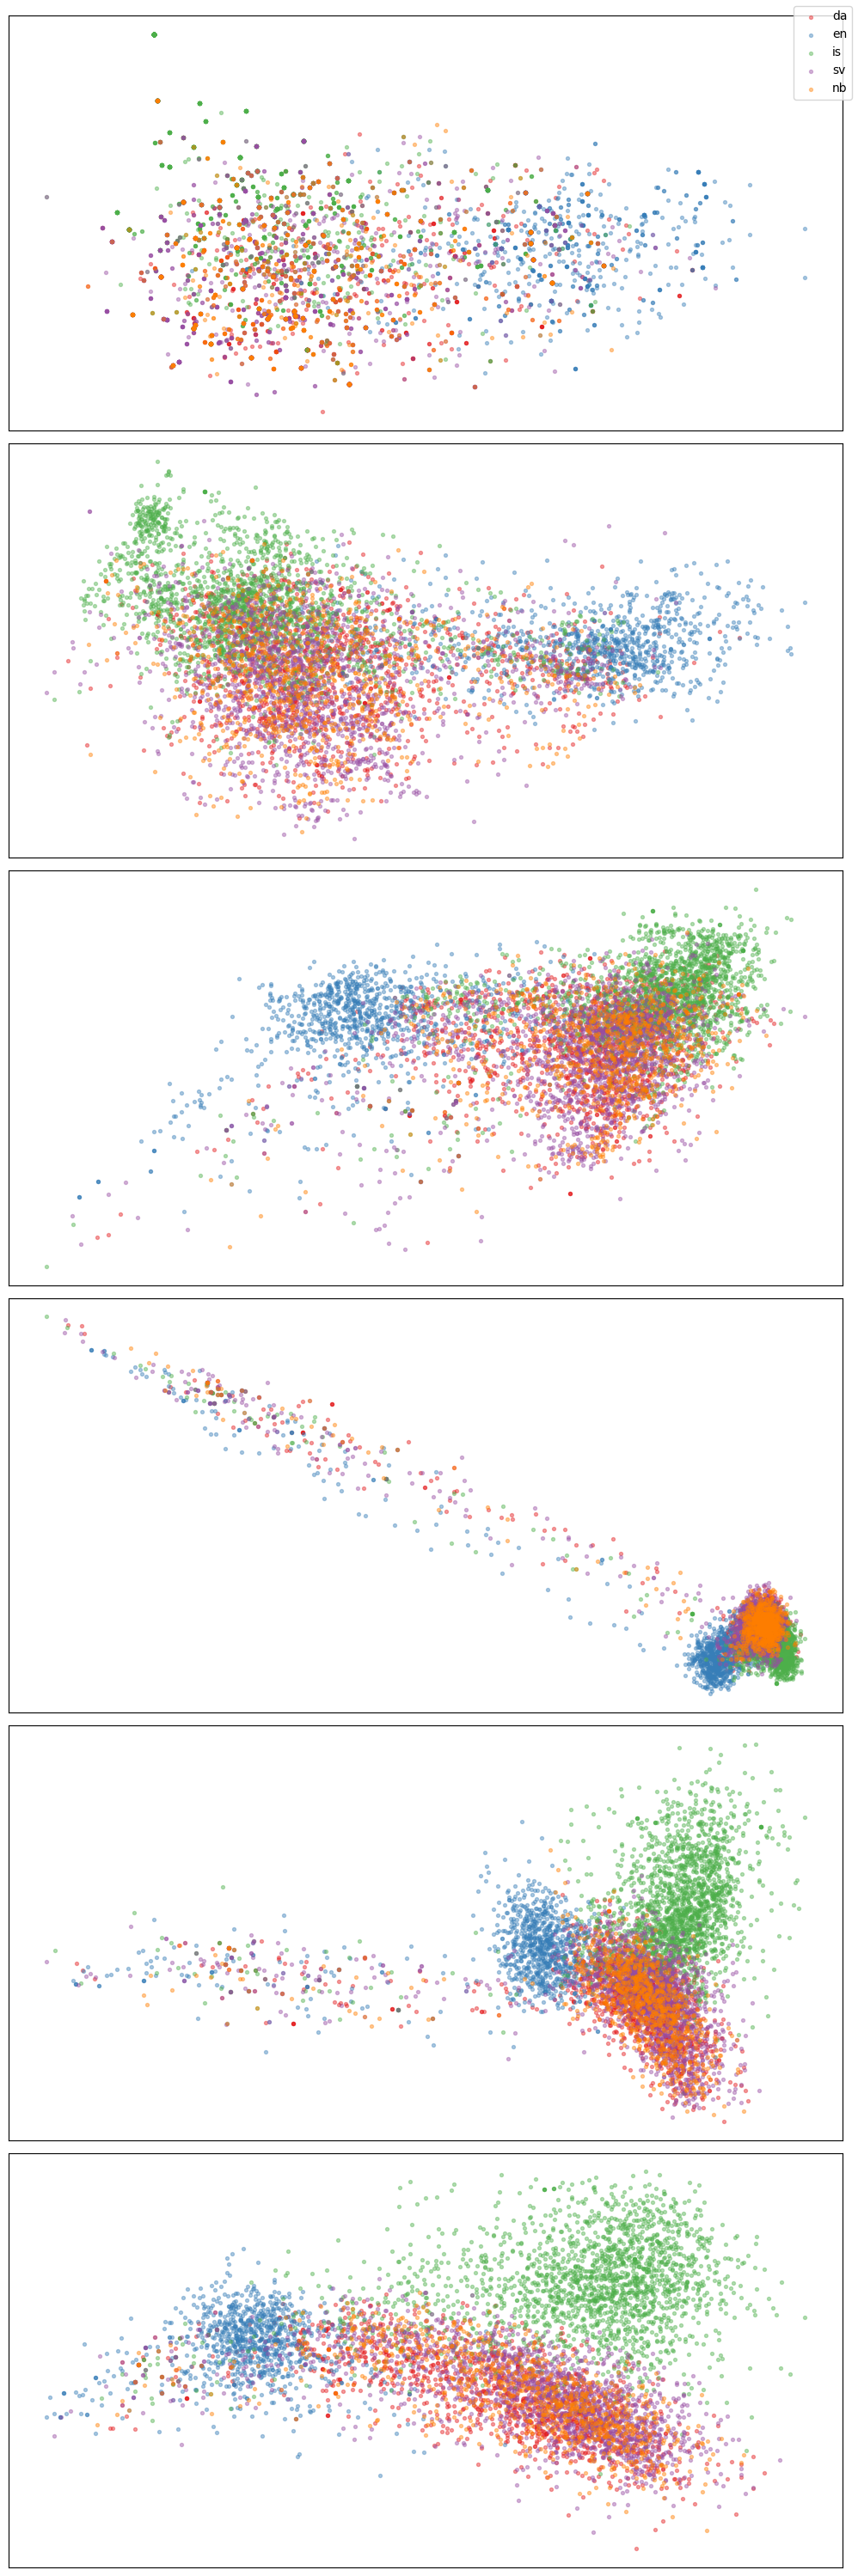

In [33]:
fig, axs = plt.subplots(len(activations), 1, figsize=(10,30))
axs = axs.flatten()


for idx in range(len(activations)):
    ax = axs[idx]
    transformed = compute_PCA(activations[idx])

    plot_PCA(transformed, ax)

lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels)
fig.tight_layout()